In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np

from plottable import Table, ColumnDefinition
from plottable.formatters import decimal_to_percent
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut

# supplementary figures

In [5]:
test = pd.read_csv('/home/dkriukov/ComputAge/tmp_bench_results/bench2_published_bench_adj_pvals.csv', index_col=0)

test.head(3)

,IBD:GSE32148:AAP,AS:GSE56581:AAP,IBD:GSE87640:AAP,HIV:GSE67751:AAP,RA:GSE131989:AAP,RA:GSE134429:AAP,OBS:GSE49909:AAP,OP:GSE99624:AAP,WS:GSE131752:AAP,HGPS:GSE182991:AAP,CGL:GSE214297:AAP
Horvathv1,0.454860,0.929344,0.454860,0.000158,0.479419,0.690786,0.862874,0.993061,0.175922,0.929344,0.001923
Hannum,0.687500,0.997572,0.074406,0.054521,0.450865,0.450865,0.997572,0.997572,0.450865,0.450865,0.074406
Lin,0.077629,0.949155,0.036278,0.000017,0.851966,0.642649,0.851966,0.851966,0.274047,0.851966,0.949155


In [145]:
#AAP
aap = test.filter(regex='AAP')


data = aap.copy()
data = data.where(data < 0.05)
data = -np.log10(data) 
total = np.isfinite(data).sum(1).sort_values(ascending=False)
sorted_indices = total.index
data['Total'] = total
data = data.loc[sorted_indices].iloc[:16]

In [125]:



# # Create the heatmap
# plt.figure(figsize=(10, 6))
# ax = sns.heatmap(data.iloc[:, :-1], square=True, cmap='OrRd',
#                  cbar_kws={'label': '-log10(adj.P-value)'},
#                  linecolor='k',
#                  linewidth=0.5
#                  )

# # Customize x-axis ticks
# ax.xaxis.tick_top() # x axis on top
# ax.xaxis.set_label_position('top')
# ax.yaxis.set_tick_params(colors='k')
# ax.xaxis.set_tick_params(rotation=50, colors='k')
# ax.set_xticklabels(ax.get_xticklabels(), ha='left', fontsize=8, color='k')
# ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=8, color='k')
# # ax.bar.set_linewidth(2)


# ax.collections[0].cmap.set_bad('0.65')
# plt.tight_layout()
# plt.show()

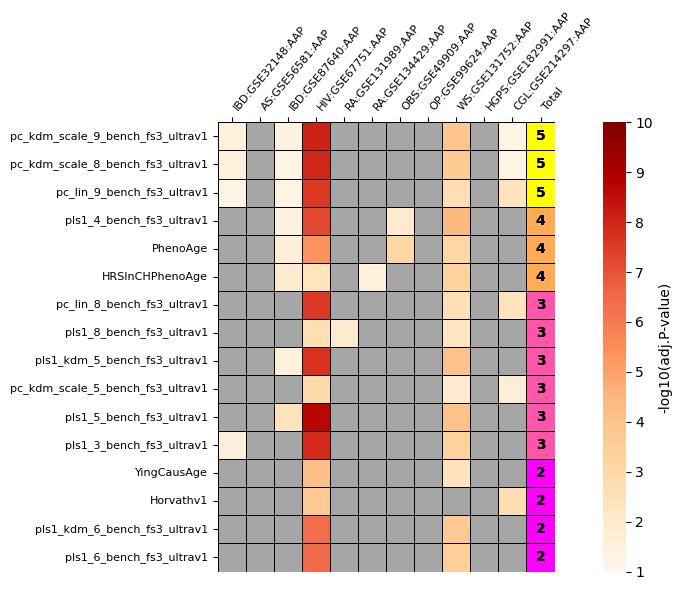

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the main heatmap
fig, axes = plt.subplots(1, 1, figsize=(10, 6), sharey=True)
ax = sns.heatmap(data, square=True, cmap='OrRd',
                 cbar_kws={'label': '-log10(adj.P-value)'},
                 vmin=1, vmax=10,
                 linecolor='k', 
                 linewidth=0.5, 
                 ax=axes, 
                 cbar=True
                 )

data2 = data.copy()
data2.iloc[:, :-1] = float('nan')
sns.heatmap(data2, annot=True, cmap="spring", cbar=False, ax=axes,
            linecolor='k', 
            linewidth=0.5, )

# Add annotations to the last column of the heatmap
for i in range(len(data.index)):
    ax.text(len(data.columns) - 0.5, i + 0.5, str(data.iloc[i, -1]),
            ha='center', va='center', color='k', fontsize=8)

# Change colors of the cells in the last column
for text in ax.texts:
    text.set_color('k')
    text.set_fontweight('bold')
    text.set_fontsize(10)

# Customize x-axis ticks
ax.xaxis.tick_top()  # x axis on top
ax.xaxis.set_label_position('top')
ax.yaxis.set_tick_params(colors='k')
ax.xaxis.set_tick_params(rotation=50, colors='k')
ax.set_xticklabels(ax.get_xticklabels(), ha='left', fontsize=8, color='k')
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=8, color='k')

axes.collections[0].cmap.set_bad('0.65')
plt.tight_layout()
plt.show()

In [ ]:
#AA0

aa0 = test.filter(regex='AA0')

In [51]:
data = {'Name': ['Horvath', 'Pheno', 'DeAge'],
        'Value': [0.32, 0.12, 0.99, ],
        'Metric': [82, 68, 17],
        'KPI': [82, 68, 17]}
df = pd.DataFrame(data)

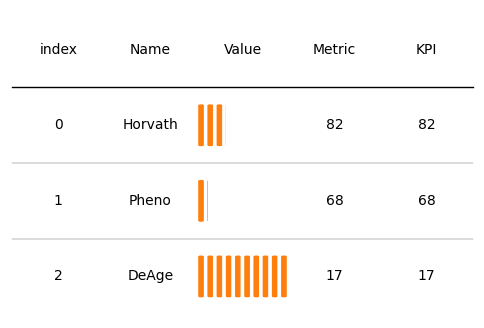

In [52]:
# Init a figure 
fig, ax = plt.subplots(figsize=(6, 4))

# Create the Table() object
tab = Table(df,
            textprops={"ha": "center"},
            column_definitions=[ColumnDefinition("Value",
                                                 plot_fn=percentile_bars,
                                                 plot_kw={"is_pct": True})]
           )

# Display the output
plt.show()